<a href="https://colab.research.google.com/github/smathews88/nlp/blob/main/01_ml_NLP_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing**

---



# **1.Steps in NLP**

![](https://drive.google.com/uc?id=14VG8EG6LWudifRF4Q9nlRE70WJC2ZRsv)

# **1.1 Text Cleaning :**

Sometimes our acquired data may contain HTML tags, spelling mistakes, or special characters. some techniques to clean our text data.

**Unicode Normalization:** if text data may contain symbols, emojis, graphic characters, or special characters. Either we can remove these characters or we can convert this to machine-readable text.  

**Regex or Regular Expression:** Regular Expression is the tool that is used for searching the string of specific patterns.  Suppose our data contain phone number, email-Id, and URL. we can find such text using the regular expression. we can keep or remove such text patterns as per requirements.

**Spelling corrections:**  When our data is extracted from social media. Spelling mistakes are very common in that case. To overcome this problem we can create a corpus or dictionary of the most common mistype words and replace these common mistakes with the correct word.

In [ ]:
 # Unicode Nomalization
text = "GeeksForGeeks ????"
print(text.encode('utf-8'))

text1 = 'गीक्स फॉर गीक्स ????'
print(text1.encode('utf-8'))
Output :

# **1.2 Pre-Processing**

NLP software mainly works at the sentence level and it also expects words to be separated at the minimum level. So, first, we need to Tokenize our text data.

# **Tokenization:**
Tokenization is the process of segmenting the text into a list of tokens. In the case of sentence tokenization, the token will be sentenced and in the case of word tokenization, it will be the word. It is a good idea to first complete sentence tokenization and then word tokenization, here output will be the list of lists. Tokenization is performed in each & every NLP pipeline.

# **Lowercasing**:
This step is used to convert all the text to lowercase letters.

# **Stop word removal:**
Stop words are commonly occurring words in a language such as “the”, “and”, “a”, etc.

#**Stemming or lemmatization:**
Stemming and lemmatization are used to reduce words to their base form, which can help reduce the vocabulary size and simplify the text. Stemming involves stripping the suffixes from words to get their stem, whereas lemmatization involves reducing words to their base form based on their part of speech.

# **Removing digit/punctuation:**
This step is used to remove digits and punctuation from the text.

# **POS tagging:**
POS tagging involves assigning a part of speech tag to each word in a text.

#**Entity Recognition (NER):**
NER involves identifying and classifying named entities in text, such as people, organizations, and locations.

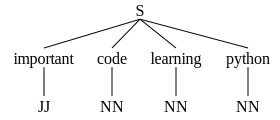

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#!pip install svgling

# sample text to be preprocessed
text = 'It is very important to code while learning python'
def preprocess(text) :
  # tokenize the text
  tokens = word_tokenize(text)

  # remove stop words
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

  # perform stemming and lemmatization
  stemmer = SnowballStemmer('english')
  lemmatizer = WordNetLemmatizer()
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # remove digits and punctuation
  cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

  # convert all tokens to lowercase
  lowercase_tokens = [token.lower() for token in cleaned_tokens]

  # perform part-of-speech (POS) tagging
  pos_tags = pos_tag(lowercase_tokens)

  # perform named entity recognition (NER)
  named_entities = ne_chunk(pos_tags)

  return named_entities

preprocess(text)

# **1.3  Feature Engineering:**
FE is to represent the text in the numeric vector in such a way that the ML algorithm can understand the text attribute. In NLP this process of feature engineering is known as Text Representation or Text Vectorization.

There are two most common approaches for Text Representation.


# **1.3.1 Classical approach**

we create a vocabulary of unique words assign a unique id (integer value) for each word. and then replace each word of a sentence with its unique id.  Here each word of vocabulary is treated as a feature


**One Hot Encoder:**One Hot Encoding represents each token as a binary vector. First mapped each token to integer values. and then each integer value is represented as a binary vector where all values are 0 except the index of the integer. index of the integer is marked by 1.

**Bag of Word(Bow):**
A bag of words only describes the occurrence of words within a document or not. It just keeps track of word counts and ignores the grammatical details and the word order.

**Bag of n-grams:**
  In Bag of Words, there is no consideration of the phrases or word order. Bag of n-gram tries to solve this problem by breaking text into chunks of n continuous words.

**TF-IDF (Term Frequency – Inverse Document Frequency):**In all the above techniques,  Each word is treated equally. TF-IDF tries to quantify the importance of a given word relative to the other word in the corpus.

*TF(t,d) = (Number of occurrences of term t in document d)/(Total number of terms in the document d)*

*IDF(t)= log<sub>e</sub> ((Total number of documents in the corpus)/(Number of documents with term t in corpus))*


 *TF-IDF Score = TF * IDF*

# **1.3.2 Nueral approch**

in the neural approach or word embedding, we try to incorporate the contextual meaning of the words.

**1. Train our own embedding layer:**
There are two ways to train our own word embedding vector :

**CBOW (Continuous Bag of Words):**
In this case, we predict the center word from the given set of context words i.e previous and afterwords of the center word.

    For example :

    I am learning Natural Language Processing from GFG.

    I am learning Natural _____?_____ Processing from GFG.
**SkipGram:**

In this case, we predict the context word from the center word.  

    For example :

    I am learning Natural Language Processing from GFG.

    I am __?___ _____?_____ Language ___?___ ____?____ GFG.

**2. Pre-Trained Word Embeddings :**
These models are trained on a very large corpus.

Some of the most popular pre-trained embeddings are as follows :

1. **Word2vec by Google**
2. **GloVe by Stanford**
3. **fasttext by Facebook**

In [ ]:
import gensim.downloader as api

# load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
    similarity = model.similarity(pair[0], pair[1])
    print(f"Similarity between '{pair[0]}' and '{pair[1]}' using Word2Vec: {similarity:.3f}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similarity between 'learn' and 'learning' using Word2Vec: 0.637
Similarity between 'india' and 'indian' using Word2Vec: 0.697
Similarity between 'fame' and 'famous' using Word2Vec: 0.326


In [ ]:
import torch
import torchtext.vocab as vocab

# load the pre-trained GloVe model
glove = vocab.GloVe(name='840B', dim=300)

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
    vec1, vec2 = glove[pair[0]], glove[pair[1]]
    similarity = torch.dot(vec1, vec2) / (torch.norm(vec1) * torch.norm(vec2))
    print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")

.vector_cache/glove.840B.300d.zip: 2.18GB [06:49, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [06:07<00:00, 5975.48it/s]


Similarity between 'learn' and 'learning' using GloVe: 0.768
Similarity between 'india' and 'indian' using GloVe: 0.764
Similarity between 'fame' and 'famous' using GloVe: 0.507


In [ ]:
import gensim.downloader as api

# load the pre-trained fastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
	similarity = fasttext_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using Word2Vec: {similarity:.3f}")


[==================================================] 100.0% 958.5/958.4MB downloaded
Similarity between 'learn' and 'learning' using Word2Vec: 0.642
Similarity between 'india' and 'indian' using Word2Vec: 0.708
Similarity between 'fame' and 'famous' using Word2Vec: 0.519
